In [2]:
#first and foremost we need a qiskit installation
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [3]:
#we will use these imports as follows - qiskit as qk for easier typing,
#quantum circuit for the qcs, assemble and aer for state on circuit measurments later
import qiskit as qk
from qiskit import QuantumCircuit
from qiskit import assemble
from qiskit import Aer


/srv/conda/envs/notebook/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  "future release.", DeprecationWarning)


In [4]:
#we initialize a qcirc with 2 qbits
mycirc = qk.QuantumCircuit(2)

In [5]:
#we define the 1 and 0 states
state_one=[0,1]
state_zero=[1,0]

In [6]:
#we assign those states to the 1st and 2nd qbit as said in the task 1
mycirc.initialize(state_one, 1)
mycirc.initialize(state_zero,0)

In [7]:
#check what it looks like
print(mycirc)

     ┌─────────────────┐
q_0: ┤ initialize(1,0) ├
     ├─────────────────┤
q_1: ┤ initialize(0,1) ├
     └─────────────────┘


In [8]:
#first time applying hadamard to both qbits
mycirc.h([0])
mycirc.h([1])


In [9]:
print(mycirc)

     ┌─────────────────┐┌───┐
q_0: ┤ initialize(1,0) ├┤ H ├
     ├─────────────────┤├───┤
q_1: ┤ initialize(0,1) ├┤ H ├
     └─────────────────┘└───┘


In [10]:
#apply cnot to qbits, then apply hadamard to each once again. draw the circuits
mycirc.cx([0],[1])
mycirc.h([0])
mycirc.h([1])
mycirc.draw()


┌─────────────────┐┌───┐     ┌───┐
q_0: ┤ initialize(1,0) ├┤ H ├──■──┤ H ├
     ├─────────────────┤├───┤┌─┴─┐├───┤
q_1: ┤ initialize(0,1) ├┤ H ├┤ X ├┤ H ├
     └─────────────────┘└───┘└───┘└───┘

In [11]:
#acquire the result of gates applications via the aer import
svsim = Aer.get_backend('statevector_simulator')
objectq = assemble(mycirc)     
outcome1 = svsim.run(objectq).result()

In [12]:
#acquire state vector and see results as numbers (i and j are complex numbers representations in python)
fin = outcome1.get_statevector()
print(fin)

[-7.85046229e-17+3.08148791e-32j  1.11022302e-16+6.12323400e-17j
  1.57009246e-16+6.12323400e-17j  1.00000000e+00-2.44929360e-16j]


In [13]:
#we measure all qbits as stated in task 1
mycirc.measure_all()

mycirc.draw()

┌─────────────────┐┌───┐     ┌───┐ ░ ┌─┐   
   q_0: ┤ initialize(1,0) ├┤ H ├──■──┤ H ├─░─┤M├───
        ├─────────────────┤├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐
   q_1: ┤ initialize(0,1) ├┤ H ├┤ X ├┤ H ├─░──╫─┤M├
        └─────────────────┘└───┘└───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════════════════════════════╩══╩═
                                              0  1

In [14]:
#i wanted to plot the histogram to see what the result 
#looks like in probability terms
from qiskit.visualization import plot_histogram, plot_bloch_vector

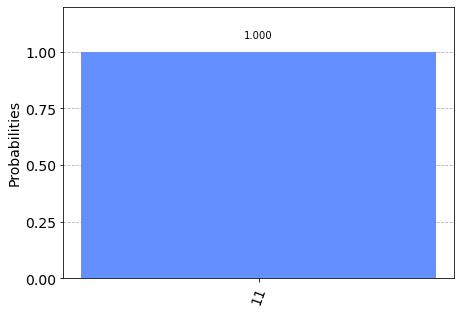

In [15]:
#we get counts from the result and then see whats the probability of some state
#occuring, in this case state |11> occurs 100% of the time.
#that is because we applied hadamard, cnot and then hadamard and effectively
##changed the initial 01 state to 11. if we didnt reapply hadamard we'd get a flipped 
#state, as in 10. 
objq = assemble(mycirc)
result = svsim.run(objq).result()
counts = result.get_counts()
plot_histogram(counts)